 ## 1. IMPORT REQUIRED LIBRARIES

In [2]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data %matplotlib inline
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. LOAD THE DATASET

In [5]:
# import csv file
Data = pd.read_csv('C:\\Users\\user\\Music\\Supermart Grocery Sales - Retail Analytics Dataset.csv', encoding = 'unicode_escape')


In [6]:
Data.shape

(9994, 11)

In [7]:
Data.columns

Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [8]:
# Display the first few rows of the dataset
print(Data.head())

  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [11]:
pd.isnull(Data)

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


In [83]:
pd.isnull(Data).sum

<bound method DataFrame.sum of       ï»¿Order ID  Customer Name  Category  Sub Category   City  Order Date  \
0           False          False     False         False  False       False   
1           False          False     False         False  False       False   
2           False          False     False         False  False       False   
3           False          False     False         False  False       False   
4           False          False     False         False  False       False   
...           ...            ...       ...           ...    ...         ...   
9989        False          False     False         False  False       False   
9990        False          False     False         False  False       False   
9991        False          False     False         False  False       False   
9992        False          False     False         False  False       False   
9993        False          False     False         False  False       False   

      Region  Sales 

In [12]:
Data.shape

(9994, 11)

## 3. DATA PREPROCESSING
 **1. Check for Missing Values and Handle Them**

In [13]:
# Check for missing values
print(Data.isnull().sum())

ï»¿Order ID      0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [14]:
# Drop any rows with missing values
Data.dropna(inplace = True)

In [15]:
Data.shape

(9994, 11)

In [16]:
Data.drop_duplicates(inplace = True)

In [17]:
Data.shape

(9994, 11)

**2. Convert Date Columns to DateTime Format**

In [18]:
Data['Order Date'] = pd.to_datetime(Data['Order Date'], errors='coerce')


In [19]:
#If your date strings are not consistent in format, use the errors='coerce' parameter, which will convert invalid formats to NaT (Not a Time):

print(Data['Order Date'].isna().sum())


5952


In [92]:
# Convert 'Order Date' to datetime format
# Extract day, month, and year from 'Order Date'
Data['Order Day'] = Data['Order Date'].dt.day
Data['Order Month'] = Data['Order Date'].dt.month
Data['Order Year'] = Data['Order Date'].dt.year


In [93]:
print(Data.head())

  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu        8.0   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu        8.0   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu       12.0   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu       11.0   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu       11.0   

   Order Month  Order Year  
0         11.0      2017.0  
1         11.0      2017.0  
2    

## 3. Label Encoding for Categorical Variables


In [41]:
le = LabelEncoder()

# Encode categorical variables
Data['Category'] = le.fit_transform(Data['Category'])
Data['Sub Category'] = le.fit_transform(Data['Sub Category'])
Data['City'] = le.fit_transform(Data['City'])
Data['Region'] = le.fit_transform(Data['Region'])
Data['State'] = le.fit_transform(Data['State'])
Data['Order Month'] = le.fit_transform(Data['Order Month'])
# Display the first few rows after encoding
print(Data.head())

  ï»¿Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0         OD1        Harish         5            14    21 2017-11-08       2   
1         OD2         Sudha         1            13     8 2017-11-08       3   
2         OD3       Hussain         3             0    13 2017-06-12       4   
3         OD4       Jackson         4            12     4 2016-10-11       3   
4         OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12     401      0        8.0           10      2017.0  
1    749      0.18     149      0        8.0           10      2017.0  
2   2360      0.21     165      0       12.0            5      2017.0  
3    896      0.25      89      0       11.0            9      2016.0  
4   2355      0.26     918      0       11.0            9      2016.0  


In [25]:
Data['Profit'] = Data['Profit'].astype('int')

In [26]:
Data['Profit'].dtypes

dtype('int32')

In [28]:
Data.columns

Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')

In [29]:
Data.rename(columns={'Region' : 'Zone'})

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Zone,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401,0,8.0,11.0,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149,0,8.0,11.0,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165,0,12.0,6.0,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89,0,11.0,10.0,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918,0,11.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,2,9,9,NaT,4,945,0.16,359,0,NaN,NaN,NaN
9990,OD9991,Alan,0,1,6,2015-07-12,4,1195,0.26,71,0,12.0,7.0,2015.0
9991,OD9992,Ravi,3,20,0,2017-06-06,4,1567,0.16,501,0,6.0,6.0,2017.0
9992,OD9993,Peer,5,22,14,NaT,4,1659,0.15,597,0,NaN,NaN,NaN


In [30]:
#describe() method returns description of the data in the dataframe (i.e. count, mean, std, etc)
Data.describe()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
count,9994.000000,9994.000000,9994.000000,4042,9994.000000,9994.000000,9994.000000,9994.000000,9994.0,4042.000000,4042.000000,4042.000000
mean,3.015309,11.090855,11.429258,2017-04-28 03:16:17.931716864,2.053132,1496.596158,0.226817,374.459676,0.0,6.452499,8.022761,2016.723404
min,0.000000,0.000000,0.000000,2015-01-03 00:00:00,0.000000,500.000000,0.100000,25.000000,0.0,1.000000,1.000000,2015.000000
25%,1.000000,5.000000,6.000000,2016-05-09 06:00:00,1.000000,1000.000000,0.160000,180.000000,0.0,3.000000,5.000000,2016.000000
50%,3.000000,11.000000,11.000000,2017-07-01 00:00:00,1.000000,1498.000000,0.230000,320.000000,0.0,6.000000,9.000000,2017.000000
75%,5.000000,17.000000,17.000000,2018-06-01 00:00:00,4.000000,1994.750000,0.290000,525.000000,0.0,9.000000,11.000000,2018.000000
max,6.000000,22.000000,23.000000,2018-12-11 00:00:00,4.000000,2500.000000,0.350000,1120.000000,0.0,12.000000,12.000000,2018.000000
std,2.008006,6.677107,6.931600,NaN,1.629766,577.559036,0.074636,239.930240,0.0,3.501948,3.267876,1.119750


In [31]:
# use decribe for specific columns
Data[['Order Date', 'Discount', 'Profit']].describe()

,Order Date,Discount,Profit
count,4042,9994.000000,9994.000000
mean,2017-04-28 03:16:17.931716864,0.226817,374.459676
min,2015-01-03 00:00:00,0.100000,25.000000
25%,2016-05-09 06:00:00,0.160000,180.000000
50%,2017-07-01 00:00:00,0.230000,320.000000
75%,2018-06-01 00:00:00,0.290000,525.000000
max,2018-12-11 00:00:00,0.350000,1120.000000
std,NaN,0.074636,239.930240


## Step 4: Exploratory Data Analysis (EDA)

**1. Distribution of Sales by Category**


In [32]:
Data.columns

Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')

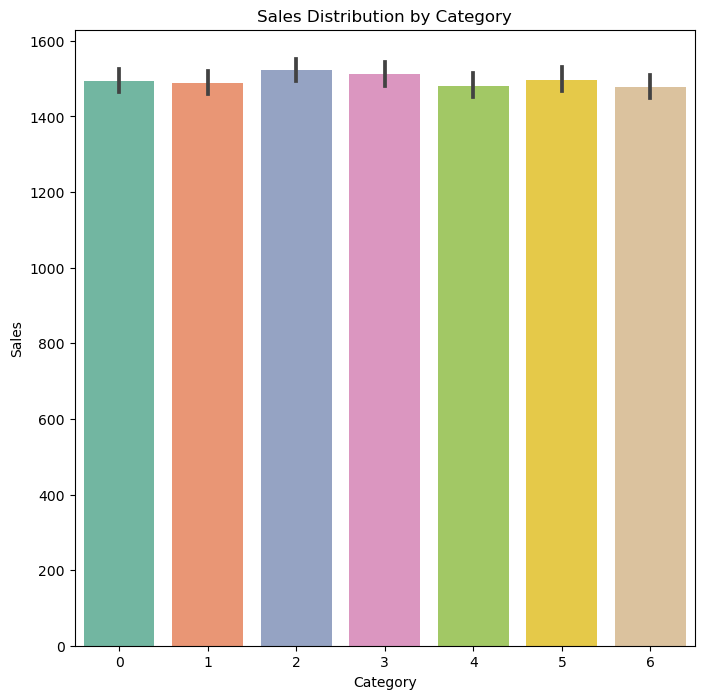

In [56]:
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot a barplot (for 'Category' vs 'Sales')
import seaborn as sns
sns.barplot(x='Category', y='Sales', data=Data, palette='Set2')

# Display the image (optional: if you want to overlay an image, ensure 'image' is defined)
# plt.imshow(image)  # Uncomment if you want to overlay an image

plt.axis('on')  # Keep axes visible since this is a bar plot
plt.title('Sales Distribution by Category')  # Add a title
plt.xlabel('Category')  # Label for the x-axis
plt.ylabel('Sales')  # Label for the y-axis
plt.show()


**2. Sales Trends Over Time**

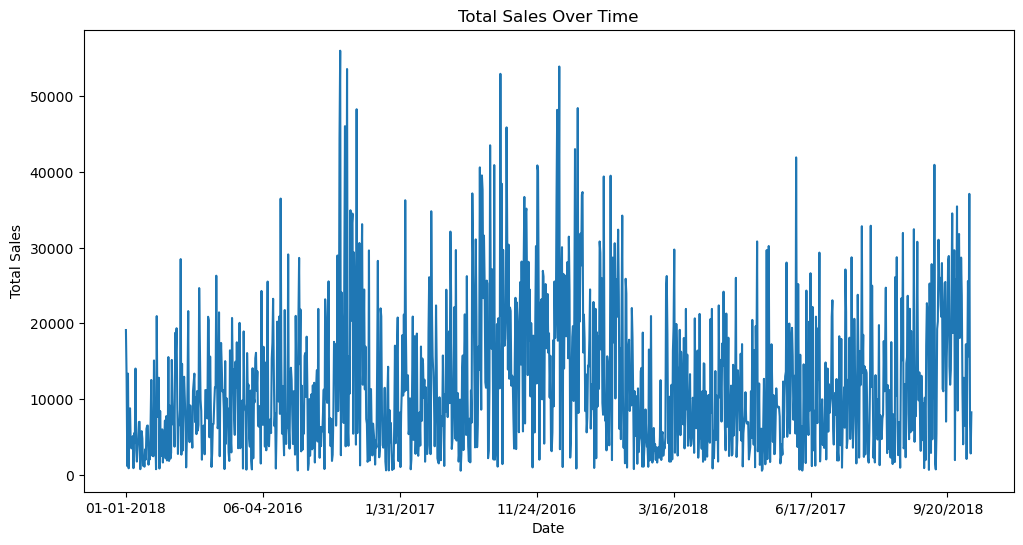

In [24]:
plt.figure(figsize=(12, 6))
Data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

**3. Correlation Heatmap**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


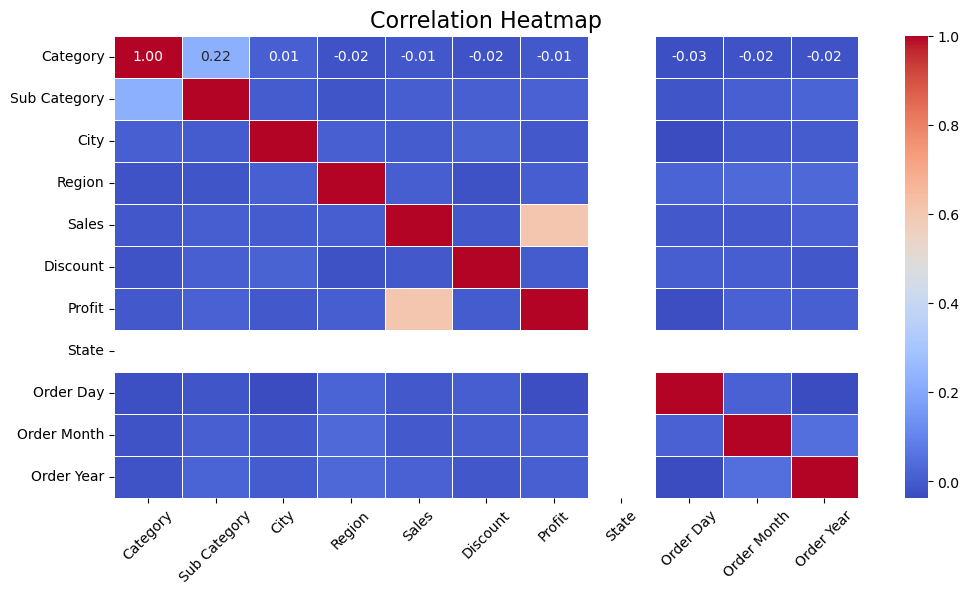

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example correlation matrix plot
plt.figure(figsize=(12, 6))
corr_matrix = Data.select_dtypes(include=['number']).corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Step 4: Feature Selection and Model Building.

**We’ll use features like Category, Sub Category, City, Region, State, month_no, Discount, and Profit to predict Sales**.

In [24]:
Data.columns

Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [25]:
# Select features and target variable
features = Data.drop(columns=['Customer Name',
'Order Date', 'Sales'])
target = Data['Sales']
print(features.isna().sum())
features = features.fillna(0) 
features = pd.get_dummies(features, drop_first=True) 
print(features.shape)
print(target.shape)

ï»¿Order ID     0
Category        0
Sub Category    0
City            0
Region          0
Discount        0
Profit          0
State           0
dtype: int64
(9994, 10050)
(9994,)


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [27]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 5: Train a Linear Regression Model.

In [29]:
# Initialize the model
model = LinearRegression()


In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model.
Evaluate the model performance using Mean Squared Error (MSE) and R-squared.

In [20]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 240291.53741240557
R-squared: 0.27143893731385516


## Step 8: Visualize the Results
**1. Actual vs Predicted Sales**

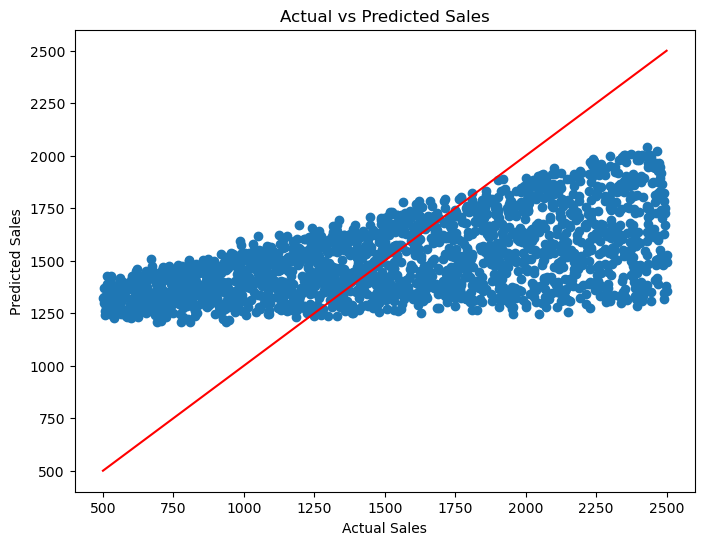

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

## Step 9: Conclusion


## Next Steps:

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O  (pd.read_csv)
# Input data fil

In [ ]:
# Input data files are available in the read-only "../input/"directory
# For example, running this (by clicking run or pressingShift+Enter) will list all files under the input directory

In [32]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you createa version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
Data = pd.read_csv('C:\\Users\\user\\Downloads\\Supermart Grocery Sales - Retail Analytics Dataset (1).csv', encoding = 'unicode_escape')

In [38]:
#display the first five rows of the data
Data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [39]:
# lets check data type of each column of the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [45]:
#Let's change the datatype of Order Date from object to date
Data ["Order Date"] = pd.to_datetime (Data ["Order Date"], errors='ignore')

In [46]:
#changed to date data type
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [78]:
# applying groupby() function to
# group the data on Category.
Da=Data.groupby("Category")
Da.first()

,ï»¿Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
Data.columns 


Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [48]:
# Sum up sales by month
Sales_Category = Data.groupby('Category')['Sales'].sum().reset_index()

In [52]:
# Sort the data by month
Sales_Category_sorted = Sales_Category.sort_values(by='Category')

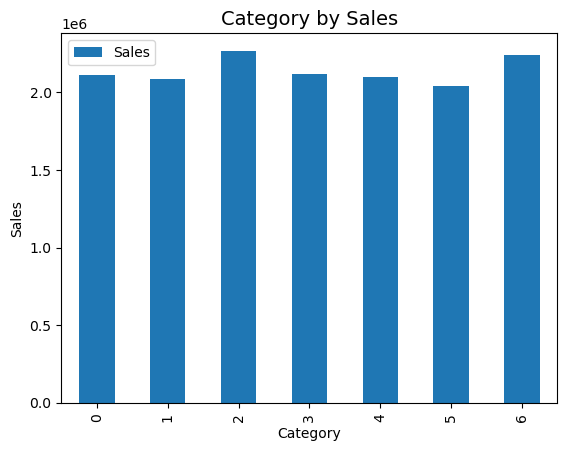

In [72]:
#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales for each Category
Sales = Data.groupby("Category")["Sales"].sum()
#we create a plot of sales by category
Sales_Category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [54]:
Data.columns

Index(['ï»¿Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [32]:
#Extract month from the order date
#Extract month from the order date
Data['month_no'] = Data['Order Date'].dt.month
Data['Month'] = pd.to_datetime(Data['Order Date']).dt.strftime('%B')
Data['year'] = Data['Order Date'].dt.year

In [34]:
#check the data to view the added columns
Data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,November,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,November,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,June,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,October,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,October,2016.0


In [35]:
# Sum up sales by month
monthly_sales = Data.groupby('Month')['Sales'].sum().reset_index()

In [36]:
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

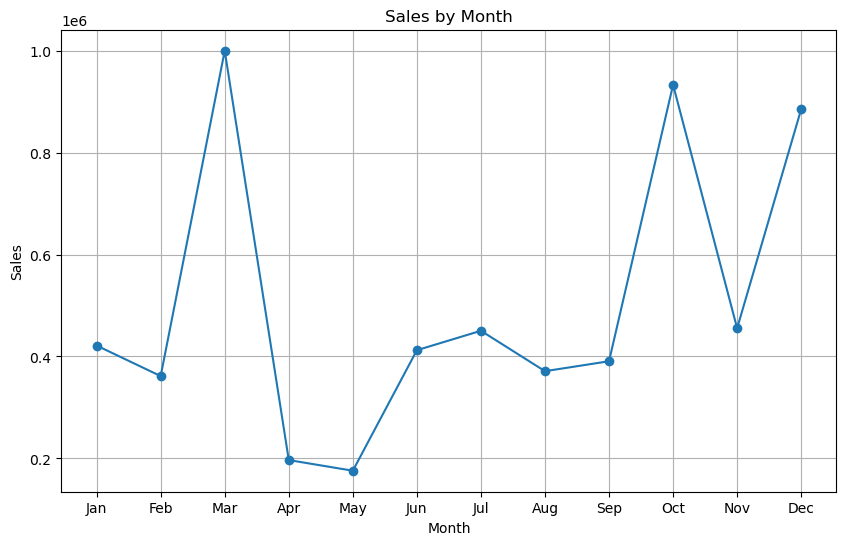

In [37]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

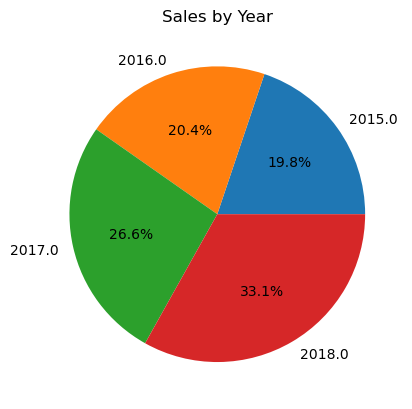

In [62]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=Data.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()

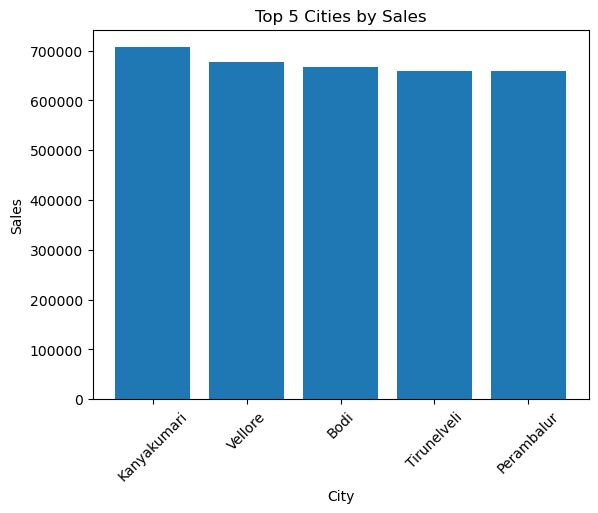

In [70]:
# Step 1: Extract relevant columns
city_sales = Data[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales', ascending = False )

# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()